In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math as m

In [2]:
dataset = pd.read_csv('../data/raw/BeijingPM20100101_20151231.csv', parse_dates = [['year', 'month', 'day', 'hour']])
dataset.rename(columns = {'year_month_day_hour': 'time'}, inplace = True)
dataset['time'] = [datetime.strptime(t, '%Y %m %d %H') for t in dataset['time']]
dataset.head()

,time,No,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010-01-01 00:00:00,1,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010-01-01 01:00:00,2,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010-01-01 02:00:00,3,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010-01-01 03:00:00,4,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010-01-01 04:00:00,5,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [3]:
print('PM_Dongsi:{} \nPM_Dongsihuan:{} \nPM_Nongzhanguan:{} \nPM_US Post:{} \n'.format(
    dataset['PM_Dongsi'].count(), dataset['PM_Dongsihuan'].count(), 
    dataset['PM_Nongzhanguan'].count(), dataset['PM_US Post'].count()))

PM_Dongsi:25052 
PM_Dongsihuan:20508 
PM_Nongzhanguan:24931 
PM_US Post:50387 



In [4]:
dataset.drop(columns=['No', 'PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season'], inplace = True)

In [6]:
dataset.head()

,time,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010-01-01 00:00:00,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010-01-01 01:00:00,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010-01-01 02:00:00,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010-01-01 03:00:00,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010-01-01 04:00:00,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [7]:
dataset.dropna(inplace=True)
dataset.head()

,time,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
23,2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0
24,2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0
25,2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0
26,2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0
27,2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0


In [8]:
np.unique(dataset.cbwd)

array(['NE', 'NW', 'SE', 'cv'], dtype=object)

In [9]:
dataset.head()

,time,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
23,2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,cv,0.89,0.0,0.0
24,2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,SE,1.79,0.0,0.0
25,2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,SE,2.68,0.0,0.0
26,2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,SE,3.57,0.0,0.0
27,2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,SE,5.36,0.0,0.0


In [10]:
dataset.drop(columns = ['cbwd', 'Iws'], inplace=True)

In [11]:
dataset.head()

,time,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,Iprec
23,2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,0.0,0.0
24,2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,0.0,0.0
25,2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,0.0,0.0
26,2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,0.0,0.0
27,2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,0.0,0.0


In [12]:
dataset['hour_x'] = (np.cos(2*np.pi/24 * dataset.time.dt.hour))
dataset['hour_y'] = (np.sin(2*np.pi/24 * dataset.time.dt.hour))

dataset['month_x'] = (np.cos(2*np.pi/12 * dataset.time.dt.month))
dataset['month_y'] = (np.sin(2*np.pi/12 * dataset.time.dt.month))
dataset.set_index('time', inplace = True)

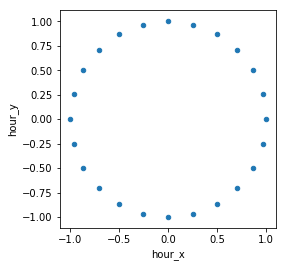

In [13]:
dataset.head(24).plot.scatter('hour_x','hour_y').set_aspect('equal')

In [14]:
dataset.to_csv('../data/processed/beijing.csv')